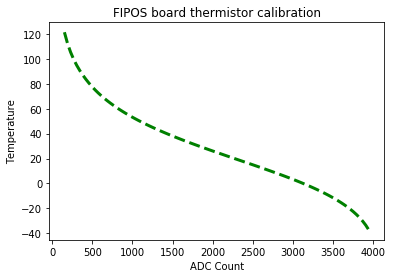

In [4]:
%matplotlib inline

def fipos_thermistor_cal():
    from scipy import interpolate
    temps=[-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25,
           30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
           105, 110, 115, 120, 125]
    adc=[3972.291151, 3927.370935, 3869.451327, 3795.92674, 3704.600096,
         3593.238247, 3460.369957, 3305.419031, 3129.278263, 2933.684449,
         2721.964441, 2500.36307, 2273.125056, 2048, 1829.510403, 1621.972457,
         1428.638708, 1251.753073, 1091.966263, 949.5873406, 823.911807,
         713.9506234, 618.034474, 535.4993046, 464.1503813, 402.5825068,
         348.8588418, 302.7049454, 263.3419356, 229.9160146, 201.3532376,
         176.832823, 155.6819655, 137.3646468]
    temp_cal = interpolate.interp1d(adc, temps, kind = 'cubic')
    return temp_cal
#
# you only need to call the calibration once
# the function temp_cal can be used to convert ADC to degrees
#

# Example:

from numpy import linspace
import matplotlib.pyplot as plt
temp_cal=fipos_thermistor_cal()
adc_gen = linspace(150, 3950,100)
plt.plot(adc_gen,temp_cal(adc_gen),'--',linewidth=3,color='green')
plt.xlabel("ADC Count")
plt.ylabel("Temperature")
plt.title('FIPOS board thermistor calibration')
plt.show()

1.42108547152e-14


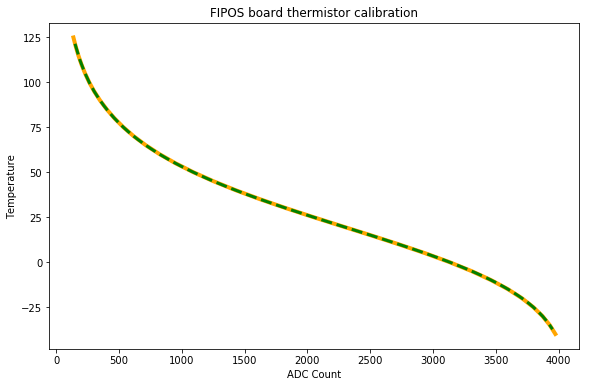

In [3]:
%matplotlib inline

def fipos_thermistor_cal():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import interpolate
temps=[-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
       70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]
adc=[3972.291151, 3927.370935, 3869.451327, 3795.92674, 3704.600096, 3593.238247, 3460.369957, 
 3305.419031, 3129.278263, 2933.684449, 2721.964441, 2500.36307, 2273.125056, 2048, 1829.510403, 
 1621.972457, 1428.638708, 1251.753073, 1091.966263, 949.5873406, 823.911807, 713.9506234, 618.034474, 
 535.4993046, 464.1503813, 402.5825068, 348.8588418, 302.7049454, 263.3419356, 229.9160146, 201.3532376, 
 176.832823, 155.6819655, 137.3646468]
plt.rcParams['figure.figsize'] = [9.5, 6]
plt.plot(adc,temps,linewidth=4,color='orange')
f2 = interpolate.interp1d(adc, temps, kind = 'cubic')
adc_gen = np.linspace(150, 3950,100)
plt.plot(adc_gen,f2(adc_gen),'--',linewidth=3,color='green')
residuals=[temps-f2(adc)]
print(np.max(residuals))
plt.xlabel("ADC Count")
plt.ylabel("Temperature")
plt.title('FIPOS board thermistor calibration')
plt.show()

In [25]:
def plot_hole_info(ax,hole_coords,nons,fifs):
    for i in range(len(hole_coords)):
        x = hole_coords[i][0]
        y = hole_coords[i][1]

        if i not in nons:
            ax.plot(x, y, color = 'lightgrey', marker='o', zorder = -1)
            if i in fifs:
                text = 'F' + str(i)
                col = 'blue'
            elif i in gifs:
                text = 'G' + str(i)
                col = 'purple'
            else:
                text = i
                col = 'black'
            ax.text(x-.1, y + 0.3, text, color = col, fontsize=6)


In [ ]:
def plot_hole_temp(ax,hole_coords,nons,fifs,x,y,temps):
    ax.scatter(x,y,c=temps)
    
    for i in range(len(hole_coords)):
        x = hole_coords[i][0]
        y = hole_coords[i][1]
        
        if i not in nons:
            ax.plot(x, y, color = 'lightgrey', marker='o', zorder = -1)
            if i in fifs:
                text = 'F' + str(i)
                col = 'blue'
            elif i in gifs:
                text = 'G' + str(i)
                col = 'purple'
            else:
                text = i
                col = 'black'
            ax.text(x-.1, y + 0.3, text, color = col, fontsize=6)
    '''
    x = np.arange(100)
y = x
t = x
plt.scatter(x, y, c=t)
plt.show()
    if self.saved_holes['passed_holes']:
        xs = [self.hole_coords[i][0] for i in self.saved_holes['passed_holes']]
        ys = [self.hole_coords[i][1] for i in self.saved_holes['passed_holes']]
        self.ax.scatter(xs, ys, s = 150, color = 'palegreen', zorder = 0, label = 'Movetest PASSED')
    if self.saved_holes['failed_holes']:
        xs = [self.hole_coords[i][0] for i in self.saved_holes['failed_holes']]
        ys = [self.hole_coords[i][1] for i in self.saved_holes['failed_holes']]
        self.ax.scatter(xs, ys, s = 150, color = 'tomato', zorder = 0, label = 'Movetest FAILED')
    if self.saved_holes['skipped_holes']:
        xs = [self.hole_coords[i][0] for i in self.saved_holes['skipped_holes']]
        ys = [self.hole_coords[i][1] for i in self.saved_holes['skipped_holes']]
        self.ax.scatter(xs, ys, s = 150, color = 'lightskyblue', zorder = 0, label = 'Movetest SKIPPED')
    if self.saved_holes['fw_verified_holes']:
        xs = [self.hole_coords[i][0] for i in self.saved_holes['fw_verified_holes']]
        ys = [self.hole_coords[i][1] for i in self.saved_holes['fw_verified_holes']]
        self.ax.scatter(xs, ys, marker = 'h', s = 60, color = 'lightseagreen', zorder = 2, label = 'FW UPDATE VERIFIED')
    '''
    #holes = ax.scatter(hole_coords[hole][0], hole_coords[hole][1], marker= '*', s=200, color = 'gold', zorder = 3, label = 'CURRENT')
    #points = ax.transData.transform(column_stack((hole_coords[:,0], hole_coords[:,1])))
    #ax.legend()
    #canvas.draw()
    #ax.clear()

In [84]:
postemps={'can11': {640: 1356, 1280: 1259, 1137: 1196, 774: 1319, 1292: 1276, 1037: 1279, 1038: 1209, 401: 1177, 1298: 1506, 1043: 1261, 1302: 1405, 1048: 1237, 410: 1425, 1051: 1333, 1308: 1391, 798: 1248, 418: 1163, 931: 1506, 1060: 1159, 423: 1361, 1576: 1411, 944: 1151, 1329: 1210, 1331: 1215, 1054: 1162, 1596: 1390, 1854: 1267, 703: 1662, 1575: 1536, 1355: 1201, 1356: 1151, 1570: 1402, 419: 1524, 1294: 1220, 2139: 1593, 1534: 1510, 1275: 1350, 1766: 1429, 743: 1292, 1386: 1234, 1319: 1155, 1645: 1619, 624: 1334, 1320: 1170, 629: 1361, 1271: 1279, 1017: 1272, 507: 1214, 1277: 1393, 1022: 1593}, 'can13': {1408: 1191, 2049: 1279, 1924: 1103, 2309: 1086, 2184: 1149, 2319: 1081, 2069: 1389, 2072: 1302, 1412: 1187, 2332: 1087, 1821: 1120, 287: 1206, 2209: 1139, 2210: 1082, 291: 1467, 1445: 1451, 2086: 1217, 2347: 1106, 2094: 1179, 285: 1241, 2354: 1136, 1461: 1198, 2230: 1241, 2233: 1343, 2363: 1151, 2371: 1146, 2375: 1098, 2176: 1101, 1995: 1160, 2304: 1159, 2511: 1128, 2275: 1087, 2133: 1250, 2391: 1119, 2520: 1101, 10073: 1124, 1370: 1194, 1999: 1127, 2271: 1157, 2019: 1373, 2277: 1063, 2278: 1122, 2285: 1107, 2162: 1458, 2163: 1138, 2294: 1132, 2510: 1074, 2169: 1183, 1658: 1215, 2046: 1127, 2389: 1149}, 'can15': {1281: 1080, 2050: 1596, 1285: 1292, 1286: 1066, 1287: 1259, 2185: 1114, 2186: 1144, 1239: 1094, 1805: 1585, 2071: 1079, 2073: 1058, 1711: 1609, 2077: 1397, 2082: 1137, 1321: 1396, 1066: 1144, 1351: 1182, 2220: 1065, 2221: 1014, 2222: 1046, 2223: 1055, 2226: 1039, 2227: 1183, 52: 1629, 1462: 1063, 2104: 1082, 2329: 1112, 2110: 1083, 2112: 1137, 1342: 1158, 2118: 1139, 2119: 1082, 1354: 1408, 10059: 1070, 1314: 1385, 1358: 1295, 1359: 1202, 2007: 1107, 1395: 1617, 1377: 1215, 1378: 1224, 1256: 1087, 1900: 1072, 2159: 1132, 1392: 1202, 2291: 1068, 2293: 1059, 1655: 1099, 2298: 1116, 1663: 1095}, 'can22': {}, 'can23': {1664: 1101, 2178: 1157, 2059: 1547, 2064: 1417, 1475: 1144, 1815: 1122, 2201: 1176, 1819: 1107, 2204: 1075, 1822: 1079, 2207: 1091, 2208: 1191, 2337: 1140, 1829: 1122, 2215: 1432, 1820: 1115, 1835: 1125, 1839: 1112, 2096: 1146, 2097: 1273, 2098: 1149, 1459: 1384, 1460: 1216, 1463: 1116, 1464: 1117, 1469: 1435, 1855: 1126, 1856: 1110, 1858: 1277, 2115: 1142, 1825: 1098, 1736: 1607, 2000: 1147, 2003: 1182, 1878: 1110, 2136: 1578, 1241: 1135, 1253: 1072, 1660: 1292, 1898: 1148, 1899: 1114, 1904: 1100, 1906: 1134, 1908: 1118, 2166: 1258, 2167: 1279, 2168: 1230, 2171: 1397, 2199: 1180, 2045: 1615}, 'can10': {1409: 1495, 1451: 1384, 1413: 1273, 1414: 1718, 2092: 1647, 1867: 1496, 1423: 1559, 1427: 1698, 2004: 1633, 1621: 1296, 1558: 1351, 1431: 1378, 2074: 1621, 2076: 1434, 2013: 1626, 2080: 1453, 2081: 1606, 1765: 1429, 2090: 1392, 2091: 1638, 1964: 1478, 1629: 1592, 10067: 1661, 2101: 1524, 1597: 1325, 1434: 1580}, 'can17': {1793: 1122, 1410: 1258, 491: 1369, 1796: 1162, 1415: 1574, 1800: 1236, 1417: 1181, 1803: 1182, 1293: 1191, 1422: 1100, 271: 1412, 1040: 1279, 1299: 1185, 1305: 1117, 1306: 1232, 1799: 1177, 1052: 1234, 1818: 1086, 1310: 1191, 288: 1342, 930: 1159, 1188: 1151, 1318: 1192, 295: 1588, 1194: 1126, 1323: 1666, 1324: 1204, 1071: 1273, 1328: 1391, 1330: 1143, 1333: 1273, 2232: 1427, 1339: 1389, 1598: 1156, 1089: 1169, 8132: 1599, 1350: 1363, 1737: 1644, 1848: 1151, 1618: 1412, 2131: 1350, 1365: 1141, 1379: 1580, 1062: 1341, 1056: 1259, 1385: 1670, 1063: 1175, 8044: 1369, 1390: 1279, 1312: 1151, 1394: 1336, 1144: 1279, 1184: 1192}, 'can12': {1920: 1085, 1668: 1084, 1928: 1145, 2187: 1518, 10127: 1301, 400: 1107, 1554: 1338, 404: 1141, 1304: 1113, 796: 1094, 1438: 1118, 1313: 1103, 1826: 1108, 421: 1156, 1191: 1120, 1193: 1110, 1963: 1108, 1452: 1100, 2228: 1536, 1973: 1171, 2103: 1311, 1979: 1104, 1981: 1092, 2229: 1529, 1985: 1178, 1731: 1183, 1733: 1091, 1606: 1188, 1610: 1091, 1762: 1147, 1617: 1089, 1619: 1216, 1748: 1235, 1785: 1100, 2010: 1325, 1883: 1104, 2012: 1470, 1936: 1151, 2018: 1268, 1508: 1476, 741: 1114, 1767: 1090, 1258: 1100, 1639: 1085, 402: 1116, 1263: 1105, 1734: 1235, 628: 1126, 1141: 1078, 1620: 1174, 1279: 1087}, 'can14': {}, 'can16': {1411: 1080, 289: 1193, 1352: 1148, 2123: 1125, 1420: 1112, 1421: 1148, 2125: 1193, 1428: 1193, 1520: 1068, 1430: 1176, 1371: 1273, 1441: 1095, 290: 1136, 1763: 1093, 2020: 1081, 2085: 1097, 1776: 1072, 10056: 1293, 1659: 1115, 2039: 1094, 2040: 1111, 377: 1239, 2235: 1246, 1419: 1171, 2231: 1109, 1406: 1127}}
postemps5={'can11': {640: 1342, 1280: 1259, 1137: 1203, 774: 1328, 1292: 1258, 1037: 1321, 1038: 1234, 401: 1196, 1298: 1550, 1043: 1223, 1302: 1361, 1048: 1225, 410: 1445, 1051: 1371, 1308: 1414, 798: 1274, 418: 1186, 931: 1522, 1060: 1172, 423: 1400, 1576: 1442, 944: 1144, 1329: 1227, 1331: 1217, 1054: 1187, 1596: 1371, 1854: 1235, 703: 1681, 1575: 1590, 1355: 1223, 1356: 1173, 1570: 1385, 419: 1525, 1294: 1218, 2139: 1638, 1534: 1567, 1275: 1293, 1766: 1472, 743: 1325, 1386: 1248, 1319: 1169, 1645: 1639, 624: 1373, 1320: 1210, 629: 1401, 1271: 1297, 1017: 1271, 507: 1242, 1277: 1351, 1022: 1647}, 'can13': {1408: 1234, 2049: 1297, 1924: 1147, 2309: 1115, 2184: 1151, 2319: 1126, 2069: 1349, 2072: 1257, 1412: 1202, 2332: 1112, 1821: 1163, 287: 1267, 2209: 1149, 2210: 1102, 291: 1456, 1445: 1454, 2086: 1226, 2347: 1084, 2094: 1190, 285: 1242, 2354: 1148, 1461: 1221, 2230: 1238, 2233: 1333, 2363: 1150, 2371: 1163, 2375: 1101, 2176: 1124, 1995: 1169, 2304: 1161, 2511: 1157, 2275: 1120, 2133: 1279, 2391: 1140, 2520: 1139, 10073: 1183, 1370: 1227, 1999: 1133, 2271: 1178, 2019: 1367, 2277: 1087, 2278: 1135, 2285: 1121, 2162: 1458, 2163: 1146, 2294: 1159, 2510: 1095, 2169: 1221, 1658: 1228, 2046: 1151, 2389: 1166}, 'can15': {1281: 1126, 2050: 1597, 1285: 1294, 1286: 1114, 1287: 1273, 2185: 1143, 2186: 1163, 1239: 1106, 1805: 1591, 2071: 1121, 2073: 1101, 1711: 1574, 2077: 1393, 2082: 1188, 1321: 1378, 1066: 1171, 1351: 1196, 2220: 1107, 2221: 1098, 2222: 1093, 2223: 1105, 2226: 1083, 2227: 1189, 52: 1645, 1462: 1131, 2104: 1105, 2329: 1150, 2110: 1147, 2112: 1151, 1342: 1186, 2118: 1138, 2119: 1118, 1354: 1432, 10059: 1114, 1314: 1380, 1358: 1294, 1359: 1216, 2007: 1141, 1395: 1578, 1377: 1261, 1378: 1212, 1256: 1118, 1900: 1106, 2159: 1131, 1392: 1222, 2291: 1116, 2293: 1102, 1655: 1134, 2298: 1147, 1663: 1128}, 'can22': {}, 'can23': {1664: 1128, 2178: 1166, 2059: 1536, 2064: 1405, 1475: 1176, 1815: 1151, 2201: 1197, 1819: 1131, 2204: 1116, 1822: 1113, 2207: 1137, 2208: 1199, 2337: 1136, 1829: 1142, 2215: 1416, 1820: 1138, 1835: 1137, 1839: 1142, 2096: 1155, 2097: 1275, 2098: 1170, 1459: 1389, 1460: 1213, 1463: 1142, 1464: 1127, 1469: 1400, 1855: 1167, 1856: 1136, 1858: 1279, 2115: 1162, 1825: 1151, 1736: 1579, 2000: 1148, 2003: 1183, 1878: 1141, 2136: 1575, 1241: 1158, 1253: 1107, 1660: 1279, 1898: 1213, 1899: 1151, 1904: 1121, 1906: 1131, 1908: 1151, 2166: 1259, 2167: 1277, 2168: 1252, 2171: 1384, 2199: 1196, 2045: 1606}, 'can10': {1409: 1487, 1451: 1361, 1413: 1301, 1414: 1731, 2092: 1659, 1867: 1514, 1423: 1557, 1427: 1711, 2004: 1650, 1621: 1322, 1558: 1355, 1431: 1387, 2074: 1633, 2076: 1454, 2013: 1629, 2080: 1441, 2081: 1612, 1765: 1452, 2090: 1405, 2091: 1632, 1964: 1473, 1629: 1656, 10067: 1693, 2101: 1524, 1597: 1308, 1434: 1559}, 'can17': {1793: 1141, 1410: 1272, 491: 1390, 1796: 1201, 1415: 1564, 1800: 1266, 1417: 1275, 1803: 1204, 1293: 1206, 1422: 1133, 271: 1404, 1040: 1292, 1299: 1216, 1305: 1147, 1306: 1245, 1799: 1210, 1052: 1254, 1818: 1136, 1310: 1218, 288: 1331, 930: 1202, 1188: 1213, 1318: 1209, 295: 1652, 1194: 1148, 1323: 1629, 1324: 1205, 1071: 1302, 1328: 1380, 1330: 1177, 1333: 1275, 2232: 1425, 1339: 1387, 1598: 1216, 1089: 1175, 8132: 1596, 1350: 1379, 1737: 1624, 1848: 1199, 1618: 1389, 2131: 1364, 1365: 1173, 1379: 1585, 1062: 1328, 1056: 1277, 1385: 1655, 1063: 1171, 8044: 1374, 1390: 1289, 1312: 1189, 1394: 1342, 1144: 1299, 1184: 1228}, 'can12': {1920: 1141, 1668: 1127, 1928: 1165, 2187: 1495, 10127: 1325, 400: 1151, 1554: 1353, 404: 1173, 1304: 1168, 796: 1136, 1438: 1182, 1313: 1145, 1826: 1133, 421: 1207, 1191: 1159, 1193: 1151, 1963: 1136, 1452: 1121, 2228: 1536, 1973: 1176, 2103: 1317, 1979: 1141, 1981: 1119, 2229: 1536, 1985: 1177, 1731: 1181, 1733: 1160, 1606: 1183, 1610: 1134, 1762: 1142, 1617: 1133, 1619: 1253, 1748: 1228, 1785: 1124, 2010: 1292, 1883: 1149, 2012: 1469, 1936: 1169, 2018: 1257, 1508: 1449, 741: 1150, 1767: 1167, 1258: 1172, 1639: 1136, 402: 1177, 1263: 1134, 1734: 1225, 628: 1163, 1141: 1105, 1620: 1190, 1279: 1172}, 'can14': {}, 'can16': {1411: 1121, 289: 1231, 1352: 1191, 2123: 1166, 1420: 1151, 1421: 1183, 2125: 1237, 1428: 1244, 1520: 1110, 1430: 1226, 1371: 1316, 1441: 1135, 290: 1175, 1763: 1133, 2020: 1121, 2085: 1130, 1776: 1111, 10056: 1337, 1659: 1183, 2039: 1132, 2040: 1158, 377: 1273, 2235: 1269, 1419: 1218, 2231: 1156, 1406: 1166}}
postemps10={'can11': {640: 1299, 1280: 1187, 1137: 1117, 774: 1233, 1292: 1197, 1037: 1198, 1038: 1105, 401: 1074, 1298: 1462, 1043: 1157, 1302: 1300, 1048: 1151, 410: 1335, 1051: 1270, 1308: 1328, 798: 1174, 418: 1125, 931: 1426, 1060: 1080, 423: 1266, 1576: 1309, 944: 1023, 1329: 1129, 1331: 1142, 1054: 1073, 1596: 1399, 1854: 1156, 703: 1677, 1575: 1443, 1355: 1101, 1356: 1067, 1570: 1339, 419: 1447, 1294: 1136, 2139: 1562, 1534: 1451, 1275: 1248, 1766: 1385, 743: 1201, 1386: 1150, 1319: 1078, 1645: 1565, 624: 1260, 1320: 1091, 629: 1289, 1271: 1187, 1017: 1135, 507: 1151, 1277: 1305, 1022: 1523}, 'can13': {1408: 1118, 2049: 1234, 1924: 1019, 2309: 981, 2184: 1067, 2319: 977, 2069: 1361, 2072: 1221, 1412: 1112, 2332: 986, 1821: 1017, 287: 1156, 2209: 1023, 2210: 1023, 291: 1439, 1445: 1397, 2086: 1188, 2347: 975, 2094: 1108, 285: 1177, 2354: 1048, 1461: 1121, 2230: 1173, 2233: 1266, 2363: 1058, 2371: 1066, 2375: 1055, 2176: 1005, 1995: 1108, 2304: 1060, 2511: 1023, 2275: 991, 2133: 1170, 2391: 1042, 2520: 1005, 10073: 1044, 1370: 1091, 1999: 1055, 2271: 1060, 2019: 1326, 2277: 966, 2278: 1053, 2285: 1015, 2162: 1414, 2163: 1057, 2294: 1023, 2510: 959, 2169: 1087, 1658: 1151, 2046: 1023, 2389: 1045}, 'can15': {1281: 978, 2050: 1569, 1285: 1242, 1286: 958, 1287: 1212, 2185: 1023, 2186: 1070, 1239: 990, 1805: 1554, 2071: 978, 2073: 953, 1711: 1602, 2077: 1358, 2082: 1083, 1321: 1347, 1066: 1069, 1351: 1120, 2220: 957, 2221: 942, 2222: 944, 2223: 953, 2226: 940, 2227: 1113, 52: 1592, 1462: 993, 2104: 969, 2329: 1022, 2110: 988, 2112: 1047, 1342: 1092, 2118: 1023, 2119: 984, 1354: 1358, 10059: 987, 1314: 1347, 1358: 1258, 1359: 1143, 2007: 1022, 1395: 1562, 1377: 1182, 1378: 1134, 1256: 987, 1900: 974, 2159: 1012, 1392: 1138, 2291: 991, 2293: 963, 1655: 1013, 2298: 1023, 1663: 1008}, 'can22': {}, 'can23': {1664: 1013, 2178: 1068, 2059: 1510, 2064: 1376, 1475: 1023, 1815: 1010, 2201: 1114, 1819: 1002, 2204: 972, 1822: 1000, 2207: 1023, 2208: 1118, 2337: 1023, 1829: 984, 2215: 1383, 1820: 983, 1835: 991, 1839: 1004, 2096: 1071, 2097: 1219, 2098: 1107, 1459: 1362, 1460: 1130, 1463: 1014, 1464: 1004, 1469: 1379, 1855: 1016, 1856: 982, 1858: 1237, 2115: 1054, 1825: 1015, 1736: 1571, 2000: 1023, 2003: 1090, 1878: 981, 2136: 1529, 1241: 1075, 1253: 962, 1660: 1250, 1898: 1023, 1899: 999, 1904: 995, 1906: 985, 1908: 1005, 2166: 1203, 2167: 1224, 2168: 1151, 2171: 1348, 2199: 1099, 2045: 1575}, 'can10': {1409: 1413, 1451: 1322, 1413: 1232, 1414: 1698, 2092: 1632, 1867: 1461, 1423: 1509, 1427: 1662, 2004: 1611, 1621: 1290, 1558: 1296, 1431: 1320, 2074: 1593, 2076: 1388, 2013: 1587, 2080: 1405, 2081: 1577, 1765: 1372, 2090: 1341, 2091: 1598, 1964: 1459, 1629: 1555, 10067: 1649, 2101: 1480, 1597: 1258, 1434: 1530}, 'can17': {1793: 1047, 1410: 1211, 491: 1325, 1796: 1070, 1415: 1547, 1800: 1188, 1417: 1156, 1803: 1107, 1293: 1126, 1422: 1023, 271: 1362, 1040: 1257, 1299: 1108, 1305: 1041, 1306: 1168, 1799: 1100, 1052: 1167, 1818: 999, 1310: 1141, 288: 1305, 930: 1052, 1188: 1071, 1318: 1130, 295: 1585, 1194: 1017, 1323: 1605, 1324: 1134, 1071: 1218, 1328: 1338, 1330: 1066, 1333: 1220, 2232: 1390, 1339: 1348, 1598: 1068, 1089: 1090, 8132: 1572, 1350: 1316, 1737: 1537, 1848: 1058, 1618: 1359, 2131: 1276, 1365: 1068, 1379: 1541, 1062: 1272, 1056: 1234, 1385: 1638, 1063: 1080, 8044: 1319, 1390: 1276, 1312: 1065, 1394: 1346, 1144: 1243, 1184: 1116}, 'can12': {1920: 985, 1668: 987, 1928: 1076, 2187: 1497, 10127: 1255, 400: 997, 1554: 1299, 404: 1004, 1304: 1007, 796: 983, 1438: 1085, 1313: 994, 1826: 996, 421: 1023, 1191: 999, 1193: 987, 1963: 1023, 1452: 996, 2228: 1491, 1973: 1059, 2103: 1279, 1979: 1050, 1981: 967, 2229: 1530, 1985: 1121, 1731: 1127, 1733: 995, 1606: 1121, 1610: 986, 1762: 1103, 1617: 996, 1619: 1144, 1748: 1178, 1785: 1022, 2010: 1231, 1883: 995, 2012: 1436, 1936: 1112, 2018: 1206, 1508: 1435, 741: 1004, 1767: 1003, 1258: 1002, 1639: 1023, 402: 1013, 1263: 996, 1734: 1171, 628: 1012, 1141: 965, 1620: 1128, 1279: 987}, 'can14': {}, 'can16': {1411: 977, 289: 1107, 1352: 1023, 2123: 1023, 1420: 1012, 1421: 1052, 2125: 1100, 1428: 1105, 1520: 1023, 1430: 1101, 1371: 1159, 1441: 999, 290: 1047, 1763: 997, 2020: 983, 2085: 1009, 1776: 977, 10056: 1211, 1659: 1020, 2039: 989, 2040: 1014, 377: 1159, 2235: 1145, 1419: 1099, 2231: 1021, 1406: 1023}}
postemps15={'can11': {640: 1279, 1280: 1142, 1137: 1011, 774: 1177, 1292: 1151, 1037: 1105, 1038: 1008, 401: 976, 1298: 1433, 1043: 1127, 1302: 1307, 1048: 1086, 410: 1311, 1051: 1245, 1308: 1295, 798: 1086, 418: 1023, 931: 1384, 1060: 1004, 423: 1210, 1576: 1277, 944: 945, 1329: 1055, 1331: 1102, 1054: 994, 1596: 1335, 1854: 1121, 703: 1620, 1575: 1414, 1355: 1067, 1356: 1044, 1570: 1351, 419: 1446, 1294: 1081, 2139: 1531, 1534: 1405, 1275: 1207, 1766: 1330, 743: 1117, 1386: 1109, 1319: 1023, 1645: 1498, 624: 1201, 1320: 1006, 629: 1223, 1271: 1140, 1017: 1048, 507: 1046, 1277: 1279, 1022: 1503}, 'can13': {1408: 1102, 2049: 1257, 1924: 947, 2309: 884, 2184: 1023, 2319: 912, 2069: 1388, 2072: 1224, 1412: 1093, 2332: 892, 1821: 971, 287: 1146, 2209: 949, 2210: 926, 291: 1463, 1445: 1433, 2086: 1151, 2347: 880, 2094: 1090, 285: 1182, 2354: 981, 1461: 1109, 2230: 1151, 2233: 1279, 2363: 959, 2371: 1001, 2375: 957, 2176: 938, 1995: 1065, 2304: 995, 2511: 925, 2275: 878, 2133: 1157, 2391: 1002, 2520: 900, 1370: 989, 1999: 986, 2271: 967, 2019: 1343, 2277: 885, 2278: 997, 2285: 953, 2162: 1421, 2163: 1011, 2294: 937, 2510: 874, 2169: 1017, 1658: 1161, 2046: 964, 2389: 1004}, 'can15': {1281: 888, 2050: 1591, 1285: 1273, 1286: 852, 1287: 1226, 2185: 1005, 2186: 1052, 1239: 890, 1805: 1613, 2071: 885, 2073: 868, 1711: 1596, 2077: 1403, 2082: 1019, 1321: 1401, 1066: 1046, 1351: 1081, 2220: 888, 2221: 837, 2222: 846, 2223: 863, 2226: 852, 2227: 1109, 52: 1624, 1462: 891, 2104: 890, 2329: 959, 2110: 891, 2112: 999, 1342: 1067, 2118: 1009, 2119: 924, 1354: 1424, 1314: 1390, 1358: 1279, 1359: 1138, 2007: 968, 1395: 1599, 1377: 1187, 1378: 1177, 1256: 927, 1900: 905, 2159: 958, 1392: 1141, 2291: 927, 2293: 895, 1655: 944, 2298: 982, 1663: 957}, 'can22': {}, 'can23': {1664: 974, 2178: 1071, 2059: 1551, 2064: 1423, 1475: 999, 1815: 919, 2201: 1073, 1819: 947, 2204: 905, 1822: 866, 2207: 917, 2208: 1135, 2337: 967, 1829: 878, 2215: 1434, 1820: 878, 1835: 897, 1839: 881, 2096: 1023, 2097: 1246, 2098: 1128, 1459: 1376, 1460: 1143, 1463: 953, 1464: 965, 1469: 1410, 1855: 927, 1856: 905, 1858: 1249, 2115: 1020, 1825: 902, 1736: 1599, 2000: 992, 2003: 1067, 1878: 881, 2136: 1580, 1241: 1006, 1253: 919, 1660: 1270, 1898: 958, 1899: 901, 1904: 945, 1906: 878, 1908: 922, 2166: 1231, 2167: 1250, 2168: 1161, 2171: 1390, 2199: 1107, 2045: 1628}, 'can10': {1409: 1442, 1451: 1308, 1413: 1205, 1414: 1731, 2092: 1620, 1867: 1472, 1423: 1510, 1427: 1668, 2004: 1611, 1621: 1292, 1558: 1279, 1431: 1316, 2074: 1594, 2076: 1377, 2013: 1594, 2080: 1401, 2081: 1547, 1765: 1384, 2090: 1348, 2091: 1601, 1964: 1431, 1629: 1586, 2101: 1465, 1597: 1221, 1434: 1536}, 'can17': {1793: 1015, 1410: 1239, 491: 1270, 1796: 1006, 1415: 1579, 1800: 1180, 1417: 1068, 1803: 1123, 1293: 1140, 1422: 989, 271: 1401, 1040: 1214, 1299: 1067, 1305: 998, 1306: 1176, 1799: 1048, 1052: 1143, 1818: 918, 1310: 1158, 288: 1355, 930: 966, 1188: 1019, 1318: 1151, 295: 1614, 1194: 933, 1323: 1663, 1324: 1163, 1071: 1165, 1328: 1310, 1330: 1023, 1333: 1254, 2232: 1428, 1339: 1397, 1598: 994, 1089: 1085, 1350: 1375, 1737: 1624, 1848: 993, 1618: 1383, 2131: 1193, 1365: 1062, 1379: 1584, 1062: 1313, 1056: 1233, 1385: 1666, 1063: 1078, 1390: 1253, 1312: 1000, 1394: 1335, 1144: 1269, 1184: 1048}, 'can12': {1920: 865, 1668: 843, 1928: 1062, 2187: 1516, 400: 885, 1554: 1367, 404: 895, 1304: 926, 796: 901, 1438: 1060, 1313: 896, 1826: 933, 421: 898, 1191: 898, 1193: 902, 1963: 991, 1452: 947, 2228: 1563, 1973: 995, 2103: 1295, 1979: 991, 1981: 852, 2229: 1541, 1985: 1097, 1731: 1117, 1733: 965, 1606: 1106, 1610: 865, 1762: 1066, 1617: 911, 1619: 1151, 1748: 1132, 1785: 986, 2010: 1279, 1883: 884, 2012: 1471, 1936: 1078, 2018: 1247, 1508: 1515, 741: 933, 1767: 963, 1258: 946, 1639: 980, 402: 879, 1263: 939, 1734: 1208, 628: 915, 1141: 874, 1620: 1125, 1279: 902}, 'can14': {}, 'can16': {1411: 869, 289: 1023, 1352: 931, 2123: 935, 1420: 908, 1421: 969, 2125: 993, 1428: 1023, 1520: 871, 1430: 1023, 1371: 1016, 1441: 911, 290: 959, 1763: 894, 2020: 878, 2085: 944, 1776: 909, 1659: 937, 2039: 879, 2040: 920, 377: 1087, 2235: 1064, 1419: 1002, 2231: 919, 1406: 950}}
postemps0={'can11': {640: 2230, 1280: 2301, 1137: 2262, 774: 2195, 1292: 2237, 1037: 2253, 1038: 2272, 401: 2251, 1298: 2204, 1043: 2238, 1302: 2254, 1048: 2252, 410: 2240, 1051: 2197, 1308: 2243, 798: 2237, 418: 2210, 931: 2260, 1060: 2227, 423: 2309, 1576: 2280, 944: 2273, 1329: 2224, 1331: 2219, 1054: 2282, 1596: 2217, 1854: 2202, 703: 2272, 1575: 2213, 1355: 2247, 1356: 2247, 1570: 2317, 419: 2201, 1294: 2236, 2139: 2254, 1534: 2251, 1275: 2240, 1766: 2217, 743: 2237, 1386: 2279, 1319: 2202, 1645: 2214, 624: 2277, 1320: 2304, 629: 2256, 1271: 2292, 1017: 2237, 507: 2214, 1277: 2229, 1022: 2291}, 'can13': {1408: 2302, 2049: 2241, 1924: 2197, 2309: 2242, 2184: 2235, 2319: 2200, 2069: 2302, 2072: 2227, 1412: 2230, 2332: 2245, 1821: 2219, 287: 2226, 2209: 2223, 2210: 2197, 291: 2220, 1445: 2232, 2086: 2192, 2347: 2227, 2094: 2215, 285: 2241, 2354: 2244, 1461: 2268, 2230: 2214, 2233: 2276, 2363: 2224, 2371: 2208, 2375: 2210, 2176: 2257, 1995: 2320, 2304: 2309, 2511: 2255, 2275: 2200, 2133: 2226, 2391: 2213, 2520: 2256, 1370: 2230, 1999: 2217, 2271: 2283, 2019: 2233, 2277: 2214, 2278: 2215, 2285: 2219, 2162: 2267, 2163: 2215, 2294: 2221, 2510: 2240, 2169: 2246, 1658: 2253, 2046: 2216, 2389: 2225}, 'can15': {1281: 2259, 2050: 2201, 1285: 2311, 1286: 2240, 1287: 2241, 2185: 2241, 2186: 2232, 1239: 2260, 1805: 2195, 2071: 2249, 2200: 2215, 2073: 2231, 2223: 2253, 2077: 2232, 2082: 2247, 1321: 2230, 1066: 2248, 1351: 2267, 2220: 2216, 2221: 2218, 2222: 2241, 1711: 2233, 2226: 2235, 2227: 2249, 52: 2233, 1462: 2237, 2104: 2238, 2329: 2260, 2110: 2257, 2112: 2221, 1342: 2249, 2118: 2216, 2119: 2222, 1354: 2246, 10059: 2282, 1314: 2234, 1358: 2246, 1359: 2241, 2007: 2240, 1395: 2203, 1377: 2222, 1378: 2203, 1256: 2251, 1900: 2215, 2159: 2234, 1392: 2263, 2291: 2220, 2293: 2240, 1655: 2227, 2298: 2314, 1663: 2235}, 'can22': {}, 'can23': {1664: 2197, 2178: 2216, 2059: 2258, 2064: 2221, 1475: 2233, 1815: 2296, 2201: 2321, 1819: 2242, 2204: 2212, 1822: 2198, 2207: 2277, 2208: 2256, 2337: 2236, 1829: 2245, 2215: 2207, 1820: 2243, 1835: 2301, 1839: 2231, 2096: 2247, 2097: 2258, 2098: 2200, 1459: 2213, 1463: 2231, 1464: 2303, 1469: 2259, 1855: 2329, 1856: 2236, 1858: 2203, 2115: 2267, 1825: 2303, 1736: 2211, 2000: 2244, 2003: 2273, 1878: 2252, 2136: 2218, 1241: 2222, 1253: 2194, 1898: 2275, 1899: 2263, 2199: 2274, 1904: 2213, 1906: 2240, 1908: 2244, 2166: 2225, 2167: 2238, 2168: 2281, 2171: 2229, 1660: 2209, 2045: 2256}, 'can10': {1409: 2310, 1451: 2243, 1413: 2292, 1414: 2214, 2092: 2232, 1867: 2202, 1423: 2249, 1427: 2249, 2004: 2252, 1621: 2191, 1558: 2225, 1431: 2316, 2074: 2288, 2076: 2211, 2013: 2217, 2080: 2209, 2081: 2200, 1765: 2311, 2090: 2216, 2091: 2256, 1964: 2194, 1629: 2217, 10067: 2218, 2101: 2230, 1597: 2228, 1434: 2249}, 'can17': {1793: 2214, 1410: 2223, 491: 2223, 1796: 2231, 1415: 2231, 1800: 2266, 1417: 2248, 1803: 2245, 1293: 2263, 1422: 2226, 271: 2243, 1040: 2236, 1299: 2263, 1305: 2227, 1306: 2252, 1799: 2229, 1052: 2249, 1818: 2226, 1310: 2228, 288: 2234, 930: 2233, 1188: 2241, 1318: 2212, 295: 2224, 1194: 2241, 1323: 2272, 1324: 2232, 1071: 2219, 1328: 2225, 1330: 2223, 1333: 2245, 2232: 2253, 1339: 2238, 1598: 2237, 1089: 2251, 8132: 2235, 1350: 2250, 1737: 2215, 1848: 2265, 1618: 2284, 2131: 2245, 1365: 2271, 1379: 2222, 1062: 2246, 1056: 2235, 1385: 2256, 1063: 2171, 8044: 2225, 1390: 2230, 1312: 2261, 1394: 2231, 1144: 2254, 1184: 2255}, 'can12': {1920: 2186, 1668: 2275, 1928: 2273, 2187: 2252, 10127: 2253, 400: 2240, 1554: 2251, 404: 2303, 1304: 2277, 796: 2160, 1438: 2261, 1313: 2215, 1826: 2200, 421: 2276, 1191: 2272, 1193: 2211, 1963: 2254, 1452: 2182, 2228: 2210, 1973: 2292, 2103: 2230, 1979: 2230, 1981: 2226, 2229: 2283, 1985: 2276, 1731: 2255, 1733: 2236, 1606: 2212, 1610: 2298, 1762: 2244, 1617: 2218, 1619: 2212, 1748: 2193, 1785: 2197, 2010: 2217, 1883: 2253, 2012: 2229, 1936: 2234, 2018: 2253, 1508: 2214, 741: 2267, 1767: 2279, 1258: 2205, 1639: 2247, 402: 2242, 1263: 2268, 1734: 2218, 628: 2317, 1141: 2233, 1620: 2255, 1279: 2216}, 'can14': {}, 'can16': {1411: 2257, 289: 2240, 1352: 2205, 2123: 2238, 1420: 2242, 1421: 2248, 2125: 2253, 1428: 2209, 1520: 2215, 1430: 2234, 1371: 2237, 1441: 2244, 290: 2248, 1763: 2247, 2020: 2233, 2085: 2222, 1776: 2233, 10056: 2230, 1659: 2225, 2039: 2214, 2040: 2224, 377: 2157, 2235: 2240, 1419: 2238, 2231: 2243, 1406: 2233}}
postemps=postemps15
ids=[]
temps=[]
for id,val in postemps.items():
    _ids=list(val.keys())
    _temps=list(f2([t for t in val.values()]))
    #print(_ids)
    #print (_temps)
    ids=ids+_ids
    temps=temps+_temps


Reading the hole locations from csv file and the positioner ID to hole mapping from spectroID map google sheet


[640, 1280, 1137, 774, 1292]
[44.197614970103999, 48.37418640562224, 52.769076092532643, 47.2713145780289, 48.087996611050713]
[26.0, 28.0, 58.0, 51.0, 27.0]
[111.461023, 101.04560600000001, 132.27112, 116.60719, 106.254079]
[5.2016879999999999, 23.296309000000001, 41.413640999999998, 50.44464, 14.235969000000001]


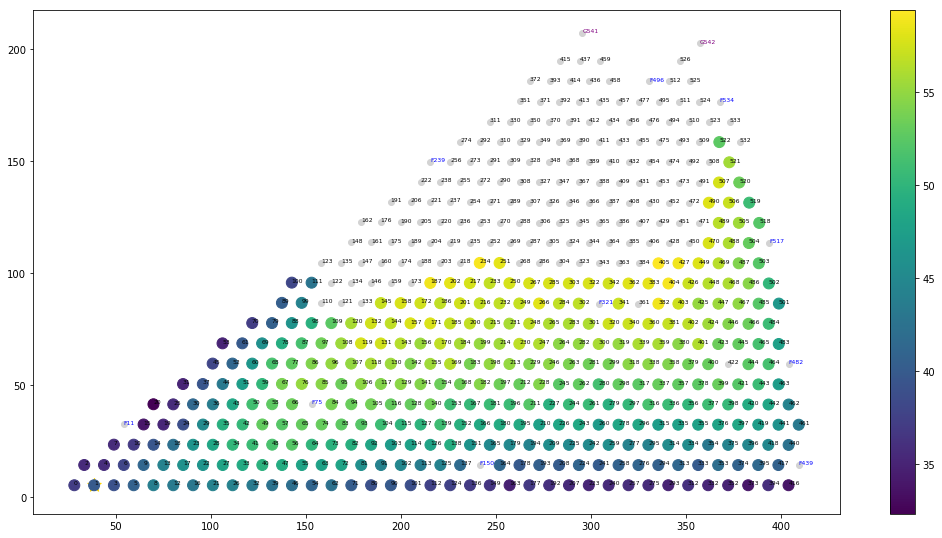

In [98]:
PETAL=1
petal_id=str(PETAL).zfill(2)
import gspread
import pandas as pd
from gspread_dataframe import get_as_dataframe
from oauth2client.service_account import ServiceAccountCredentials
# nominal hole location data
hole_coords = np.genfromtxt('hole_coords.csv', delimiter = ',', usecols = (3,4), skip_header = 40)
nons = {38, 331, 438, 460, 478, 479, 480, 481, 497, 498, 499, 500, 513, 514, 515, 516, 527, 528, 529, 530, 531, 535, 536, 537, 538, 539, 540}
gifs = {541, 542}
fifs = {11, 75, 150, 239, 321, 439, 482, 496, 517, 534}
#print(len(hole_coords))
#print(hole_coords)

fig=plt.figure(figsize = (14,7))
ax=fig.add_axes(fig.add_axes([0,0,1,1]))
plot_hole_info(ax,hole_coords,nons,fifs)
hole=1
ax.scatter(hole_coords[hole][0], hole_coords[hole][1], marker= '*', s=200, color = 'gold')

# Google sheet
url = 'https://docs.google.com/spreadsheets/d/1lJ9GjhUUsK2SIvXeerpGW7664OFKQWAlPqpgxgevvl8/edit#gid=0'
credentials = 'google_access_account.json'
scope = ['https://spreadsheets.google.com/feeds', 'https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name(credentials, scope)
client = gspread.authorize(creds)
sheet = client.open_by_url(url).sheet1
df  = get_as_dataframe(sheet, parse_dates=True, usecols=[0,1,2,3,4,6,8,14], skiprows=20, header=0)
pdf=df
pdf=pdf.loc[pdf['PETAL_ID'] == int(petal_id)]

dev_list=pdf['DEVICE_ID'].tolist()
hole_list=pdf['DEVICE_LOC'].tolist()
dev_id_loc=dict(zip(dev_list,hole_list))

#print(dev_id_loc)

print(ids[0:5])
print(temps[0:5])

holes=[dev_id_loc[str(e).zfill(5)] for e in ids]
print(holes[0:5]) 
x = [hole_coords[int(e)][0] for e in holes]
y = [hole_coords[int(e)][1] for e in holes]

print(x[0:5])
print(y[0:5])      
#print(  dev_id_loc[str(ids[0]).zfill(5)]   )
#print(hole_coords[int()]
#print(dev_id_loc)
sc=ax.scatter(x,y,s=120,c=temps)
plt.colorbar(sc)




In [99]:
print(x[0:6])

[111.461023, 101.04560600000001, 132.27112, 116.60719, 106.254079, 153.02481599999999]
